In [2]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [3]:
f = h5py.File('GW170817_GWTC-1.hdf5', 'r')
events = f['IMRPhenomPv2NRT_lowSpin_posterior']

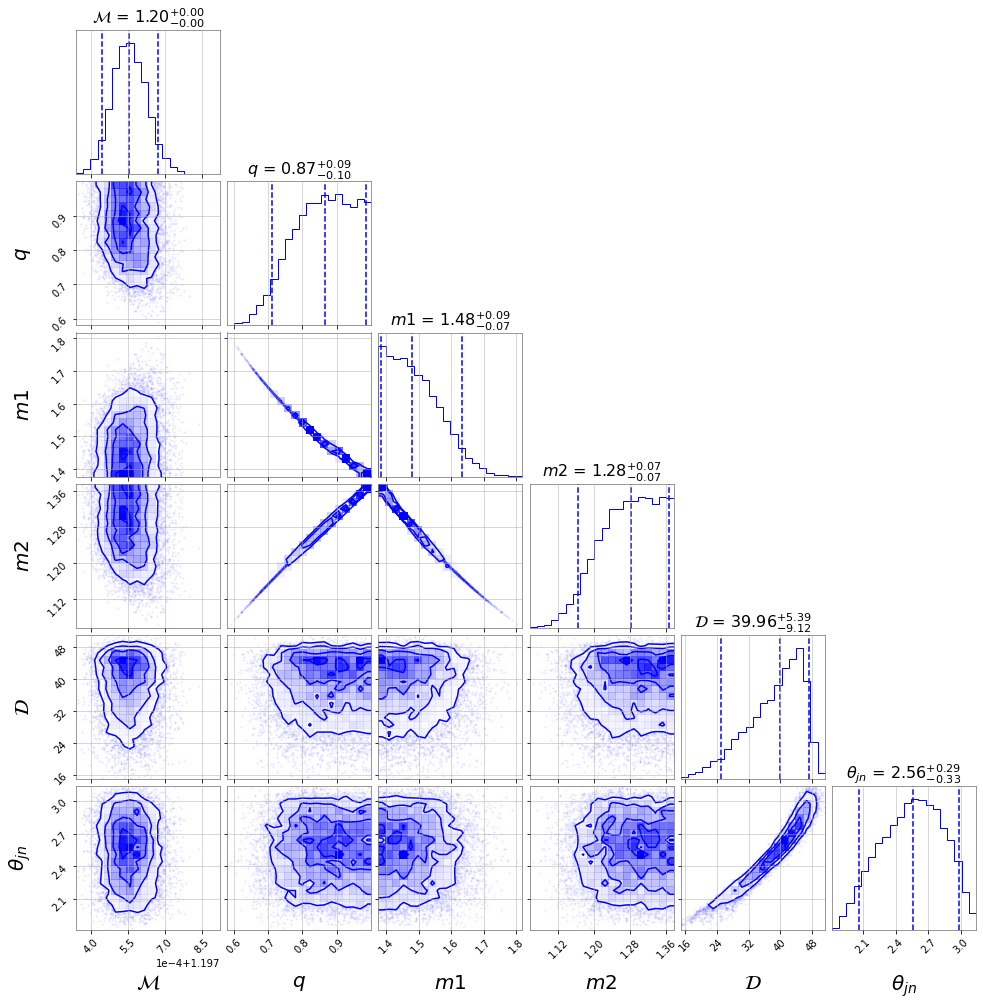

In [14]:
m11 = np.array(events['m1_detector_frame_Msun'])
m21 = np.array(events['m2_detector_frame_Msun'])
chirp_mass1 = ( (m11*m21)**(3/5) )/( (m11+m21)**(1/5) )
D1 = np.array(events['luminosity_distance_Mpc'])
theta_jn1 = np.arccos(np.array(events['costheta_jn']))
mass_ratio1 = m21/m11
#e01 = np.random.normal(0.0001, 0.00001, len(m11))
data1 = np.transpose(np.array([chirp_mass1,mass_ratio1,m11,m21,D1,theta_jn1]))
figure = corner.corner(data1, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],label_kwargs=dict(fontsize=20),
                       show_titles=True, title_kwargs={"fontsize": 16},color='blue')